<span style="font-size:10pt">AI @ ENSPIMA_2022-2023_v1.0_Jean-Luc CHARLES (Jean-Luc.charles@ensam.eu)_CC BY-SA 4.0</span>

# Problem-based learning
# Training a neural network to diagnose bearing faults - part 1 / 3

### Targeted learning objectives:
Part 1:<br>
- Know how to load files in *Matlab MAT-file* format with *Python*.
- Know how to dimension and fill numpy ndarrays with the data of the `.mat` files
- Know how to display a grid of data plots
- Know how to store the numpy ndarrays in a `.npz` file

Part 2:<br>
- Know how to load a `.npz` into numpy ndarrays
- Know how to process the temporal dataset to get a spectral dataset.
- Know how to display a grid of spectra plots.

Part 3:<br>
- Know how to train/operate a DNN to diagnose bearing faults using a labeled temporal dataset.
- The problem part of the APP: Know how to train/operate a DNN to diagnose bearing faults using a labeled temporal dataset.

<br>
<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:12pt"> 
It is important to use a <span style="font-weight:bold;">Python Virtual Environment</span> (PVE) for your main Python projects: <br>
    a PVE makes it possible to control for each project the versions of the Python interpreter and the "sensitive" modules (like tensorflow).<br><br>
    All the notebooks your work on must be loaded into a jupyter-notebook or a jupyter-lab launched in the PVE 
    <b><span style="color: rgb(100, 151, 202);" >pyml-pm</span></b> specially created for the session.<br>
</span></div>

In [1]:
import os, sys
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# 1 $-$ The *Case Western Reserve University* bearing dataset

The bearing data used in this notebook are provided by the **Case Western Reserve University (CWRU)** on the page [engineering.case.edu/bearingdatacenter/48k-drive-end-bearing-fault-data](https://engineering.case.edu/bearingdatacenter/48k-drive-end-bearing-fault-data) . <br>

The data were collected from a motor driving mechanical system under four different loads with the sampling frequency of 48 kHz:<br>
![sdsdv](./img/CWRU-TestBench.png)<br>
(source: https://engineering.case.edu/bearingdatacenter/apparatus-and-procedures)

The bearing data set was obtained under four experimental conditions:
- Normal condition (N)
- with Outer race Fault (OF)
- with Inner race Fault (IF)
- with Roller Fault (OF).

Faulted bearings were installed into the test motor and vibration data was recorded for motor loads of 0 to 3 horsepower (motor speeds of 1797 to 1720 RPM).<br>
The faults were introduced into the drive-end bearing of the motor with fault diameters of 0.18, 0.36 and 0.54 mm, respectively.

The defaults classification table is as follows:

|class label|Fault type|Fault diameter|
|:---------:|:--------:|-------------:|
| 1         | N        | 0            |
| 2         | RF       | 0.18         |
| 3         | RF       | 0.36         |
| 4         | RF       | 0.54         |
| 5         | IF       | 0.36         |
| 6         | IF       | 0.36         |
| 7         | IF       | 0.54         |
| 8         | OF       | 0.18         |
| 9         | OF       | 0.36         |
| 10        | OF       | 0.54         |
 


## 1.1 $-$ Download the the **CWRU** dataset

The **CWRU** dataset consists in about fifty [Matlab MAT-file](https://www.mathworks.com/help/matlab/import_export/mat-file-versions.html) files that can be downloaded:

- either **manually**: by clicking on the hyper-links in the page  https://engineering.case.edu/bearingdatacenter/48k-drive-end-bearing-fault-data
- either with **Python instruction**: for example with the *wget* module, to get the `.mat` files form the directory https://engineering.case.edu/sites/default/files.

By exploring the hyper-links of the page https://engineering.case.edu/bearingdatacenter/48k-drive-end-bearing-fault-data one can define the list of the .mat files involved by the previous defaults classification table:

    ['98.mat', '99.mat' '100.mat', '110.mat', '111.mat', '112.mat', '123.mat', '124.mat', '125.mat', '136.mat', '137.mat', '138.mat', '175.mat', '176.mat', '177.mat', '190.mat', '191.mat', '192.mat', '202.mat', '203.mat', '204.mat', '214.mat', '215.mat', '217.mat', '227.mat', '228.mat', '229.mat', '239.mat', '240.mat', '241.mat']

The following cells let you download all the required `.mat` files with some Python instructions.<br>

Note : If the download of the `mat` is to slow, you can can the `mat` files already downloaded in the `pre_loaded_dataset` directory.

In [2]:
# define the list of the wanted '.mat' files:
CWRU_data_file = ['98.mat', '99.mat', '100.mat', 
                  '110.mat', '111.mat', '112.mat', 
                  '123.mat', '124.mat', '125.mat', 
                  '136.mat', '137.mat', '138.mat', 
                  '175.mat', '176.mat', '177.mat', 
                  '190.mat', '191.mat', '192.mat', 
                  '202.mat', '203.mat', '204.mat', 
                  '214.mat', '215.mat', '217.mat', 
                  '227.mat', '228.mat', '229.mat', 
                  '239.mat', '240.mat', '241.mat']

In [3]:
!pip install wget

In [4]:
import wget

# the URL where to find the .mat files:
url = 'https://engineering.case.edu/sites/default/files'

# the directory where to store the downloaded files:
data_dir = "./CWRU_dataset/"
if not os.path.exists(data_dir): os.mkdir(data_dir)

# download the files and store tem:
for file in CWRU_data_file:
    file_url = os.path.join(url, file)
    target   = os.path.join(data_dir, file)
    if not os.path.exists(target):
        print(f"downloading file <{file_url}> as <{target}>")
        wget.download(file_url, target) 
        print("")
    else:
        print(f"file <{target} alredy exists>")

file <./CWRU_dataset/98.mat alredy exists>
file <./CWRU_dataset/99.mat alredy exists>
file <./CWRU_dataset/100.mat alredy exists>
file <./CWRU_dataset/110.mat alredy exists>
file <./CWRU_dataset/111.mat alredy exists>
file <./CWRU_dataset/112.mat alredy exists>
file <./CWRU_dataset/123.mat alredy exists>
file <./CWRU_dataset/124.mat alredy exists>
file <./CWRU_dataset/125.mat alredy exists>
file <./CWRU_dataset/136.mat alredy exists>
file <./CWRU_dataset/137.mat alredy exists>
file <./CWRU_dataset/138.mat alredy exists>
file <./CWRU_dataset/175.mat alredy exists>
file <./CWRU_dataset/176.mat alredy exists>
file <./CWRU_dataset/177.mat alredy exists>
file <./CWRU_dataset/190.mat alredy exists>
file <./CWRU_dataset/191.mat alredy exists>
file <./CWRU_dataset/192.mat alredy exists>
file <./CWRU_dataset/202.mat alredy exists>
file <./CWRU_dataset/203.mat alredy exists>
file <./CWRU_dataset/204.mat alredy exists>
file <./CWRU_dataset/214.mat alredy exists>
file <./CWRU_dataset/215.mat alred

Now choose your working data directory: pre_loaded_dataset or CWRU_dataset

In [5]:
####
#### comment one of the two lines:
####

#data_dir = "./pre_loaded_dataset"
data_dir = "./CWRU_dataset"

Let's check the list of the `.mat` data files that are in your `data_dir` directory:

In [6]:
list_mat_file = [ f for f in os.listdir(data_dir) if f.endswith(".mat")]
list_mat_file.sort()
print(f"List of .mat files in <{data_dir}>:\n{list_mat_file}")

List of .mat files in <./CWRU_dataset>:
['100.mat', '110.mat', '111.mat', '112.mat', '123.mat', '124.mat', '125.mat', '136.mat', '137.mat', '138.mat', '175.mat', '176.mat', '177.mat', '190.mat', '191.mat', '192.mat', '202.mat', '203.mat', '204.mat', '214.mat', '215.mat', '217.mat', '227.mat', '228.mat', '229.mat', '239.mat', '240.mat', '241.mat', '98.mat', '99.mat']


## 1.2 $-$ handling of the **CWRU** dataset

The `scipy.io.loadmat` can load a `.mat` file (*MAT-file* format < 7.3) and return the data as a Python `dict` object:

In [7]:
data_file = os.path.join(data_dir, "98.mat")

mat98 = scipy.io.loadmat(data_file)  
mat98

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 10:52:35 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X098_DE_time': array([[ 0.046104  ],
        [-0.03713354],
        [-0.089496  ],
        ...,
        [-0.09909231],
        [-0.10827138],
        [-0.07092923]]),
 'X098_FE_time': array([[ 0.02321636],
        [ 0.08115455],
        [ 0.09533091],
        ...,
        [-0.00760182],
        [ 0.04026909],
        [ 0.06102   ]])}

You can see in the above cell that the return of `loadmat` is a Python dictionary... <br><br>
 Now let's look at its **keys**:

In [8]:
mat98.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X098_DE_time', 'X098_FE_time'])

The accelerometers data are associated with the keys:<br>
- `X098_DE_time`: temporal data of the accelerometer at Drive End (DE), sampled at 48 kHz<br>
- `X098_FE_time`: temporal data of the accelerometer at Fan End (FE), sampled at 48 kHz.<br><br>
Accelerometer data in the dictionnary are `numpy.ndarray` objets:

In [9]:
type(mat98['X098_DE_time']), type(mat98['X098_FE_time'])

(numpy.ndarray, numpy.ndarray)

The arrays are single column matrices of accelerometers output sampled at 48 khz/

In [10]:
mat98['X098_DE_time'].shape, mat98['X098_FE_time'].shape

((483903, 1), (483903, 1))

## 1.3 $-$ Minimalist plot of data (`pyplot` style)

Let's name `X_DE` and `X_FE` the accelerometers data and plot the data in 2 subplots:

In [11]:
X_DE, X_FE = mat98['X098_DE_time'], mat98['X098_FE_time']

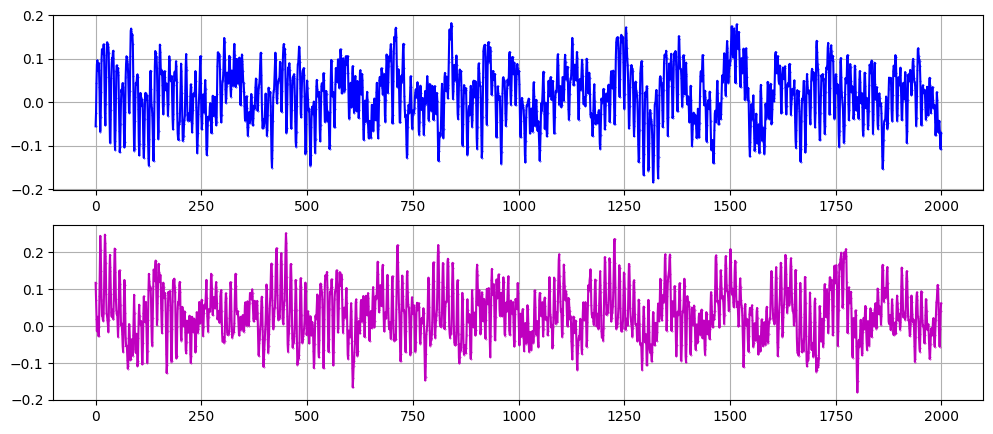

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

plt.subplot(2,1,1)
plt.plot(X_DE[-2000:], '.-b', markersize=0.6)
plt.grid()

plt.subplot(2,1,2)
plt.plot(X_FE[-2000:], '.-m', markersize=0.6)
plt.grid()

## 1.4 $-$ More elaborate plot of data (`Axes` object style)

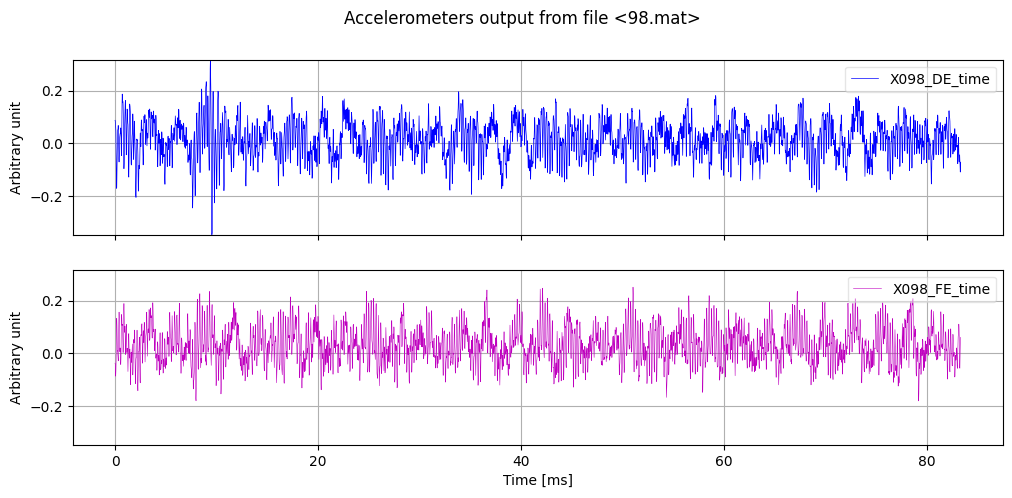

In [13]:
import matplotlib.pyplot as plt

# Let's compute a time vector for abscissa:
N = 4000                 # we take only the last 4000 temporal data points
T = np.arange(N)/48e3
T *= 1e3                 # cconvert T in milli-sec

key_DE, key_FE = 'X098_DE_time', 'X098_FE_time'
X_DE, X_FE = mat98[key_DE], mat98[key_FE]

# min and max values for plotting:
max_value = max(X_DE[-N:].max(), X_FE[-N:].max())
min_value = min(X_DE[-N:].min(), X_FE[-N:].min())

# subplots returns a figure and a list of Axes:
fig, axes = plt.subplots(2,1, sharex=True) 

fig.suptitle(f"Accelerometers output from file <{os.path.basename(data_file)}>")
fig.set_size_inches((12,5))

axe = axes[0]
axe.plot(T, X_DE[-N:], '-b', markersize=0.6, linewidth=0.5, label=key_DE)
axe.set_ylabel("Arbitrary unit")
axe.set_ylim(min_value, max_value)
axe.legend(loc='upper right', framealpha=0.5)
axe.grid()

axe = axes[1]
axe.plot(T, X_FE[-N:], '-m', markersize=0.6, linewidth=0.4, label=key_FE)
axe.set_ylabel("Arbitrary unit")
axe.set_xlabel("Time [ms]")
axe.set_ylim(min_value, max_value)
axe.legend(loc='upper right', framealpha=0.5)
axe.grid()

plt.savefig("CWRU_data.png")

## 1.5 $-$ Creating the numpy dataset from CWRU MAT-files

Now let's define 3 datasets `A`, `B` and `C` by grouping the data for motor loads 1, 2 and 3:

In [14]:
# group the CWRU files number in 3 datasets for the the motor loads 1, 2 and 3 horsepower:
num_1 = ( 98, 123, 190, 227, 110, 175, 214, 136, 202, 239)
num_2 = ( 99, 124, 191, 228, 111, 176, 215, 137, 203, 240)
num_3 = (100, 125, 192, 229, 112, 177, 217, 138, 204, 241)

# define 3 arrays for the 3 datasets above: 
# for each of the 10 health condidion we will split the full dataset in 200 samples of 1900 points,
# so the shape of each array is(10, 200, 1900):
nb_HC       = 10
nb_sample   = 200
sample_size = 1900
A = np.zeros((nb_HC, nb_sample, sample_size), dtype=float)
B = np.zeros((nb_HC, nb_sample, sample_size), dtype=float)
C = np.zeros((nb_HC, nb_sample, sample_size), dtype=float)

# loop simultaneously accross the files numbers and the dataset arrays to fill the arrays
# with the files data:
for numbers, array in zip((num_1, num_2, num_3), (A, B, C)):
    
    for hc, file_num in enumerate(numbers):
        # hc is the health condition rank in [0,9]
        
        # build the 'mat' file path:
        file = os.path.join(data_dir,f"{file_num}.mat")
        print(f"Loading file <{file:8s}>...", end="")
        
        # load the data of the file in the dict 'data':
        data = scipy.io.loadmat(file) 
        
        # build the key and get the data we want from the dictionnary:
        key = f"X{file_num:03d}_DE_time"
        X = data[key]
        print(f' got values for key {key}, shape:{X.shape}')
        
        # Try to split the data acroos the array dimensions:
        try:
            for s in range(nb_sample):
                # s is the sample number
                array[hc, s] = X[s*sample_size:(s+1)*sample_size, 0]
        except:
            print(f"Error wit file <{file_num}.mat>")
    print('-'*80)

Loading file <./CWRU_dataset/98.mat>... got values for key X098_DE_time, shape:(483903, 1)
Loading file <./CWRU_dataset/123.mat>... got values for key X123_DE_time, shape:(487384, 1)
Loading file <./CWRU_dataset/190.mat>... got values for key X190_DE_time, shape:(486224, 1)
Loading file <./CWRU_dataset/227.mat>... got values for key X227_DE_time, shape:(486804, 1)
Loading file <./CWRU_dataset/110.mat>... got values for key X110_DE_time, shape:(486224, 1)
Loading file <./CWRU_dataset/175.mat>... got values for key X175_DE_time, shape:(381890, 1)
Loading file <./CWRU_dataset/214.mat>... got values for key X214_DE_time, shape:(485063, 1)
Loading file <./CWRU_dataset/136.mat>... got values for key X136_DE_time, shape:(486804, 1)
Loading file <./CWRU_dataset/202.mat>... got values for key X202_DE_time, shape:(484483, 1)
Loading file <./CWRU_dataset/239.mat>... got values for key X239_DE_time, shape:(489125, 1)
--------------------------------------------------------------------------------


## 1.6 $-$ Plot the data

Now let's plot all the data for sample #0:

In [15]:
# create the list of the health condition labels:
health_cond = ['N']
for def_type in 'RF', 'IF', 'OF':
    for size in '18', '36', '54':
        health_cond.append(f"{def_type}.{size}")
print(f"list of {len(health_cond)} health conditions:", health_cond)

list of 10 health conditions: ['N', 'RF.18', 'RF.36', 'RF.54', 'IF.18', 'IF.36', 'IF.54', 'OF.18', 'OF.36', 'OF.54']


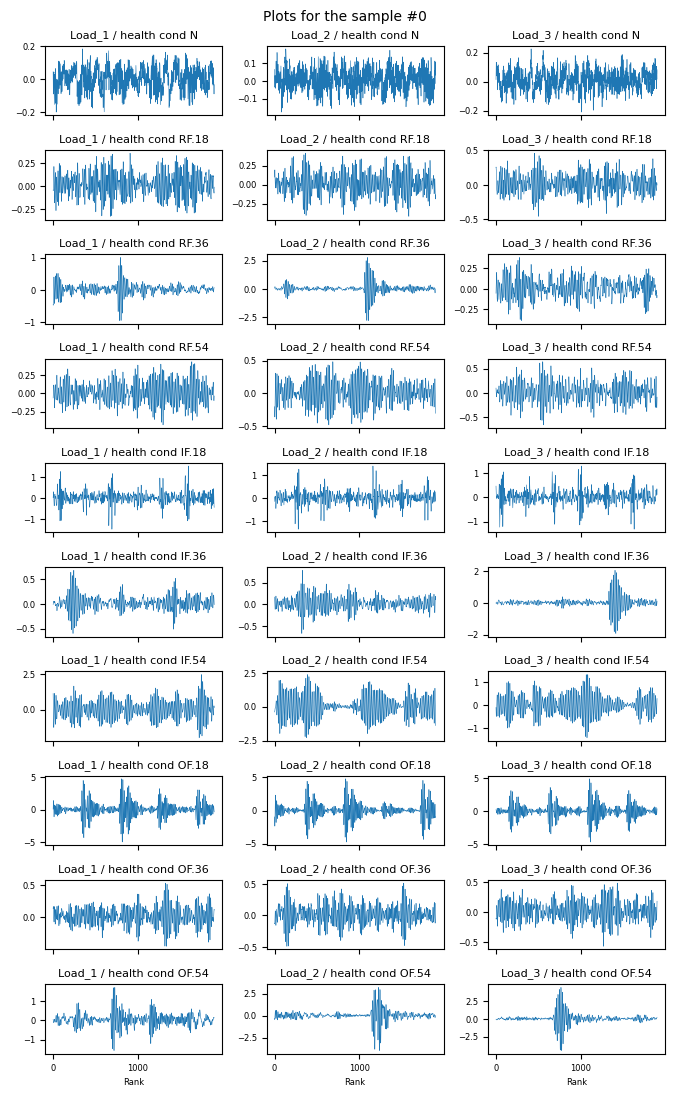

In [16]:
# define 'nb_HC', the number of health conditions:
nb_HC = len(health_cond)

# define 'nb_L', the number of load cases:
full_dataset = (A, B, C)
nb_L = len(full_dataset)

s = 0  # the sample number

plt.rcParams['font.size'] = 6   # change the pyplot defaut font size
fig, axes = plt.subplots(nb_HC, nb_L, sharex=True)
fig.set_size_inches((8,12))
plt.subplots_adjust(top=.95, wspace=0.25, hspace=0.5)
plt.suptitle(f"Plots for the sample #{s}", fontsize=10)
for n, dataset in enumerate(full_dataset):
    for h in range(nb_HC):
        axe = axes[h,n]
        axe.set_title(f"Load_{n+1} / health cond {health_cond[h]}", fontsize=8)
        axe.plot(dataset[h, s], linewidth=0.4)
        if h == nb_HC-1: axe.set_xlabel("Rank")
plt.rcParams['font.size'] = 10  # restore the pyplot defaut font size to its defautl value

## 1.7 $-$ Export the numpy dadasets in a `.npz` compressed file

In [17]:
np.savez('CWRU_dadaset', A, B, C)